# 05_Visualization_Distilbert

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Define File Paths

In [28]:
fname_result = '../Data/Output/ResultBoth_Distilbert.pkl'

### Read the Result

In [29]:
df_result = pd.read_pickle(fname_result)

In [30]:
df_result

,doc_id,fname,sentence,goal01,goal02,goal03,goal04,goal05,goal06,goal07,...,goal10,goal11,goal12,goal13,goal14,goal15,goal16,goal17,label,score
0,1,Asda_2020.pdf,Our action on sustainability supports the broa...,0.220957,0.249609,0.209004,0.140543,0.302925,0.211519,0.161349,...,0.221673,0.320755,0.243053,0.316457,0.310363,0.266566,0.314579,0.301656,Positive,1.00
1,1,Asda_2020.pdf,"In particular, our efforts are contributing to...",0.247329,0.282171,0.244253,0.187107,0.321928,0.249514,0.175626,...,0.231982,0.318060,0.236173,0.324246,0.298038,0.283017,0.303132,0.284681,Positive,1.00
2,1,Asda_2020.pdf,"For example, our work to tackle food poverty i...",0.239850,0.288944,0.202165,0.158243,0.244996,0.173143,0.131375,...,0.165640,0.270407,0.211620,0.294024,0.282431,0.283044,0.311684,0.272534,Positive,0.99
3,1,Asda_2020.pdf,Our CCFB strategy covers every aspect of our b...,0.157094,0.224665,0.140007,0.108842,0.212423,0.155067,0.143242,...,0.154378,0.153755,0.101164,0.180990,0.223748,0.151392,0.173541,0.154607,Positive,0.99
4,1,Asda_2020.pdf,It also covers International Procurement and L...,0.163866,0.202955,0.155638,0.131375,0.238785,0.139401,0.129099,...,0.171683,0.183722,0.090505,0.175276,0.187808,0.142089,0.164518,0.144709,Positive,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168271,84,Toyota_2023.pdf,Policy and Environmental Management > Environm...,0.214285,0.240569,0.191189,0.185037,0.260155,0.234097,0.201038,...,0.252605,0.323585,0.276730,0.318597,0.345756,0.309611,0.333787,0.324321,Negative,0.02
168272,84,Toyota_2023.pdf,Environmental Data [O] Remanufactured and Used...,0.113916,0.153440,0.114095,0.094321,0.159580,0.110153,0.082341,...,0.113817,0.245668,0.303303,0.320671,0.328372,0.292591,0.263292,0.249364,Negative,0.01
168273,84,Toyota_2023.pdf,306-2 Management of significant waste-related ...,0.155386,0.216601,0.160928,0.133781,0.191180,0.150989,0.134371,...,0.182886,0.265438,0.285949,0.295571,0.356245,0.336346,0.338445,0.354660,Negative,0.03
168274,84,Toyota_2023.pdf,407-1 Operations and suppliers in which the ri...,0.241352,0.238156,0.235872,0.244054,0.231353,0.268405,0.244760,...,0.233353,0.233371,0.185475,0.189659,0.195256,0.186064,0.204810,0.209217,Negative,0.03


In [31]:
df_result = df_result.reindex( ['doc_id', 'fname', 'sentence', 'label', 'score',
                                'goal01', 'goal02', 'goal03', 'goal04', 'goal05', 'goal06', 'goal07',
                                'goal08', 'goal09', 'goal10', 'goal11', 'goal12', 'goal13', 'goal14',
                                'goal15', 'goal16', 'goal17'], axis=1)

In [32]:
df_result.columns

Index(['doc_id', 'fname', 'sentence', 'label', 'score', 'goal01', 'goal02',
       'goal03', 'goal04', 'goal05', 'goal06', 'goal07', 'goal08', 'goal09',
       'goal10', 'goal11', 'goal12', 'goal13', 'goal14', 'goal15', 'goal16',
       'goal17'],
      dtype='object')

## 1) Sentence Similarity

### Convert the Score Range

In [33]:
col_list1 = list(df_result.columns[:5])
col_list2 = list(df_result.columns[5:])

In [34]:
MAX = df_result[col_list2].max().max()
MAX

np.float64(0.4765605628490448)

In [35]:
MIN = df_result[col_list2].min().min()
MIN

np.float64(-0.1458437144756317)

In [36]:
def func(x):
    return (x - MIN) * 100 / (MAX - MIN)

In [37]:
df_result_s = pd.concat([df_result[col_list1], df_result[col_list2].applymap(func)], axis=1)

/var/folders/l1/j74c0f2s2273qr62tb9_bv1w0000gn/T/ipykernel_33845/3337046953.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_result_s = pd.concat([df_result[col_list1], df_result[col_list2].applymap(func)], axis=1)


In [38]:
df_result_s

,doc_id,fname,sentence,label,score,goal01,goal02,goal03,goal04,goal05,...,goal08,goal09,goal10,goal11,goal12,goal13,goal14,goal15,goal16,goal17
0,1,Asda_2020.pdf,Our action on sustainability supports the broa...,Positive,1.00,58.932833,63.536367,57.012466,46.013023,72.102474,...,58.086817,71.110630,59.047921,74.967121,62.483051,74.276583,73.297518,66.260713,73.974851,71.898557
1,1,Asda_2020.pdf,"In particular, our efforts are contributing to...",Positive,1.00,63.170046,68.767907,62.675824,53.494317,75.155683,...,60.415536,75.237079,60.704225,74.534105,61.377562,75.527961,71.317229,68.903913,72.135724,69.171280
2,1,Asda_2020.pdf,"For example, our work to tackle food poverty i...",Positive,0.99,61.968296,69.856125,55.913666,48.856856,62.795224,...,55.814204,62.438781,50.045314,66.877843,57.432727,70.672284,68.809704,68.908232,73.509681,67.219658
3,1,Asda_2020.pdf,Our CCFB strategy covers every aspect of our b...,Positive,0.99,48.672163,59.528672,45.926813,40.919678,57.561679,...,49.721699,48.565574,48.235850,48.135771,39.686072,52.511465,59.381224,47.756040,51.314597,48.272662
4,1,Asda_2020.pdf,It also covers International Procurement and L...,Positive,1.00,49.760293,56.040560,48.438262,44.539916,61.797315,...,54.276396,46.912100,51.016109,52.950364,37.973512,51.593357,53.606980,46.261419,49.864966,46.682317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168271,84,Toyota_2023.pdf,Policy and Environmental Management > Environm...,Negative,0.02,57.860890,62.083851,54.150170,53.161663,65.230778,...,59.093838,73.842848,64.017606,75.421819,67.893773,74.620389,78.983958,73.176648,77.061031,75.540070
168272,84,Toyota_2023.pdf,Environmental Data [O] Remanufactured and Used...,Negative,0.01,41.734861,48.085025,41.763601,38.586586,49.071518,...,40.393332,59.640758,41.719035,62.903103,72.163137,74.953633,76.190933,70.442055,65.734795,63.496986
168273,84,Toyota_2023.pdf,306-2 Management of significant waste-related ...,Negative,0.03,48.397796,58.232988,49.288151,44.926570,54.148604,...,48.335326,65.418368,52.816082,66.079535,69.375016,70.920929,80.669281,77.472142,77.809379,80.414584
168274,84,Toyota_2023.pdf,407-1 Operations and suppliers in which the ri...,Negative,0.03,62.209694,61.696259,61.329167,62.643771,60.603099,...,64.268171,59.886745,60.924518,60.927418,53.232091,53.904255,54.803492,53.326688,56.338543,57.046635


### Create New Columns: Company & Year

In [39]:
df_result_s['company'] = df_result_s['fname'].str.split('_').apply(lambda x: x[0])

In [40]:
df_result_s['year'] = df_result_s['fname'].str.split(r'_|\(|\-|\.').apply(lambda x: x[1])

In [41]:
df_result_s.round(2)

,doc_id,fname,sentence,label,score,goal01,goal02,goal03,goal04,goal05,...,goal10,goal11,goal12,goal13,goal14,goal15,goal16,goal17,company,year
0,1,Asda_2020.pdf,Our action on sustainability supports the broa...,Positive,1.00,58.93,63.54,57.01,46.01,72.10,...,59.05,74.97,62.48,74.28,73.30,66.26,73.97,71.90,Asda,2020
1,1,Asda_2020.pdf,"In particular, our efforts are contributing to...",Positive,1.00,63.17,68.77,62.68,53.49,75.16,...,60.70,74.53,61.38,75.53,71.32,68.90,72.14,69.17,Asda,2020
2,1,Asda_2020.pdf,"For example, our work to tackle food poverty i...",Positive,0.99,61.97,69.86,55.91,48.86,62.80,...,50.05,66.88,57.43,70.67,68.81,68.91,73.51,67.22,Asda,2020
3,1,Asda_2020.pdf,Our CCFB strategy covers every aspect of our b...,Positive,0.99,48.67,59.53,45.93,40.92,57.56,...,48.24,48.14,39.69,52.51,59.38,47.76,51.31,48.27,Asda,2020
4,1,Asda_2020.pdf,It also covers International Procurement and L...,Positive,1.00,49.76,56.04,48.44,44.54,61.80,...,51.02,52.95,37.97,51.59,53.61,46.26,49.86,46.68,Asda,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168271,84,Toyota_2023.pdf,Policy and Environmental Management > Environm...,Negative,0.02,57.86,62.08,54.15,53.16,65.23,...,64.02,75.42,67.89,74.62,78.98,73.18,77.06,75.54,Toyota,2023
168272,84,Toyota_2023.pdf,Environmental Data [O] Remanufactured and Used...,Negative,0.01,41.73,48.09,41.76,38.59,49.07,...,41.72,62.90,72.16,74.95,76.19,70.44,65.73,63.50,Toyota,2023
168273,84,Toyota_2023.pdf,306-2 Management of significant waste-related ...,Negative,0.03,48.40,58.23,49.29,44.93,54.15,...,52.82,66.08,69.38,70.92,80.67,77.47,77.81,80.41,Toyota,2023
168274,84,Toyota_2023.pdf,407-1 Operations and suppliers in which the ri...,Negative,0.03,62.21,61.70,61.33,62.64,60.60,...,60.92,60.93,53.23,53.90,54.80,53.33,56.34,57.05,Toyota,2023


### Create List: Company & Year

In [42]:
# Company
comp_list = df_result_s['company'].unique().tolist()
# Year
year_list = sorted(df_result_s['year'].unique().tolist())

In [43]:
print(comp_list)
print(year_list)

['Asda', 'Ford', 'M&S', 'Ocado', 'Polestar', 'Sainsburys', 'Stellantis', 'Tesco', 'Tesla', 'Toyota']
['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


### Average Score: by Company for 17 SDGs

In [44]:
# df_comp = df_result_s.groupby(['company', 'year']).mean()

# Select only numeric columns for the groupby operation
numeric_columns = df_result_s.select_dtypes(include='number').columns.tolist()


In [45]:
numeric_columns

['doc_id',
 'score',
 'goal01',
 'goal02',
 'goal03',
 'goal04',
 'goal05',
 'goal06',
 'goal07',
 'goal08',
 'goal09',
 'goal10',
 'goal11',
 'goal12',
 'goal13',
 'goal14',
 'goal15',
 'goal16',
 'goal17']

In [46]:
# Ensure 'doc_id' is not in the list of numeric columns to be aggregated
if 'doc_id' in numeric_columns:
    numeric_columns.remove('doc_id')

In [47]:
numeric_columns

['score',
 'goal01',
 'goal02',
 'goal03',
 'goal04',
 'goal05',
 'goal06',
 'goal07',
 'goal08',
 'goal09',
 'goal10',
 'goal11',
 'goal12',
 'goal13',
 'goal14',
 'goal15',
 'goal16',
 'goal17']

In [48]:
# Perform the groupby operation on 'company' and 'year', then calculate the mean of numeric columns
df_comp = df_result_s.groupby(['company', 'year'])[numeric_columns].mean()

In [49]:
df_comp

score     goal01     goal02     goal03     goal04     goal05  \
company year                                                                    
Asda    2020  0.838214  54.975052  60.614770  54.259210  46.799885  61.505752   
        2021  0.692549  45.553231  49.252239  45.493167  41.686559  50.025681   
        2022  0.648342  44.516915  50.190026  44.608773  40.469017  48.329221   
        2023  0.720307  45.960097  51.657925  46.331532  41.590525  51.343996   
Ford    2014  0.673070  41.569615  44.147101  41.611866  40.223767  48.052722   
...                ...        ...        ...        ...        ...        ...   
Toyota  2019  0.731165  43.887399  46.616670  44.251310  41.226010  51.322536   
        2020  0.739509  44.180235  44.849034  44.726281  43.279115  49.937356   
        2021  0.725447  43.753396  45.724609  44.678122  41.740159  50.363559   
        2022  0.703190  44.386226  46.543977  45.440177  42.315977  50.604084   
        2023  0.697030  44.019844  45.884343  44.984442  42.279895  50.210803   

                 goal06     goal07     goal08     goal09     goal10  \
company year                                                          
Asda    2020  52.150197  45.766349  53.808150  57.731140  52.139416   
        2021  45.822152  41.164969  45.526670  47.323666  43.901064   
        2022  44.097836  39.893509  44.134568  46.919830  42.556884   
        2023  46.014878  40.972331  45.822970  50.030241  45.019193   
Ford    2014  42.080179  37.638553  42.759351  48.589725  41.307112   
...                 ...        ...        ...        ...        ...   
Toyota  2019  46.086312  41.930713  45.428586  51.360547  46.901564   
        2020  47.581718  44.345202  46.709386  47.896443  47.225670   
        2021  46.061543  42.526968  45.584795  49.290436  46.703337   
        2022  46.728368  43.512764  46.042940  50.208984  47.700229   
        2023  46.711227  43.292251  45.837873  49.517037  47.281298   

                 goal11     goal12     goal13     goal14     goal15  \
company year                                                          
Asda    2020  58.067428  49.654613  60.039522  59.095685  53.527299   
        2021  47.162609  41.608539  47.794238  47.624984  43.982300   
        2022  47.803619  44.376695  49.059402  50.176350  46.234812   
        2023  50.202142  45.569505  51.151907  51.532024  48.036319   
Ford    2014  46.523919  44.007583  51.252027  47.174294  45.233785   
...                 ...        ...        ...        ...        ...   
Toyota  2019  50.311603  45.377034  50.730110  49.574120  46.812027   
        2020  46.713259  40.349495  46.302351  44.595230  41.573419   
        2021  49.054397  44.297830  49.486244  47.954912  45.670620   
        2022  50.165667  45.194066  50.601863  48.956728  47.143317   
        2023  49.088358  44.232540  49.823361  47.783401  45.970705   

                 goal16     goal17  
company year                        
Asda    2020  57.448146  56.879262  
        2021  46.480231  47.340083  
        2022  47.586482  48.952868  
        2023  50.659278  51.606569  
Ford    2014  47.117100  45.094763  
...                 ...        ...  
Toyota  2019  49.128055  47.082181  
        2020  44.005510  41.734701  
        2021  47.475512  45.404758  
        2022  49.158390  46.890715  
        2023  48.081728  45.826874  

[84 rows x 18 columns]

In [50]:

# df_comp.drop('doc_id', axis=1, inplace=True)

In [51]:
df_comp.round(2)

score  goal01  goal02  goal03  goal04  goal05  goal06  goal07  \
company year                                                                  
Asda    2020   0.84   54.98   60.61   54.26   46.80   61.51   52.15   45.77   
        2021   0.69   45.55   49.25   45.49   41.69   50.03   45.82   41.16   
        2022   0.65   44.52   50.19   44.61   40.47   48.33   44.10   39.89   
        2023   0.72   45.96   51.66   46.33   41.59   51.34   46.01   40.97   
Ford    2014   0.67   41.57   44.15   41.61   40.22   48.05   42.08   37.64   
...             ...     ...     ...     ...     ...     ...     ...     ...   
Toyota  2019   0.73   43.89   46.62   44.25   41.23   51.32   46.09   41.93   
        2020   0.74   44.18   44.85   44.73   43.28   49.94   47.58   44.35   
        2021   0.73   43.75   45.72   44.68   41.74   50.36   46.06   42.53   
        2022   0.70   44.39   46.54   45.44   42.32   50.60   46.73   43.51   
        2023   0.70   44.02   45.88   44.98   42.28   50.21   46.71   43.29   

              goal08  goal09  goal10  goal11  goal12  goal13  goal14  goal15  \
company year                                                                   
Asda    2020   53.81   57.73   52.14   58.07   49.65   60.04   59.10   53.53   
        2021   45.53   47.32   43.90   47.16   41.61   47.79   47.62   43.98   
        2022   44.13   46.92   42.56   47.80   44.38   49.06   50.18   46.23   
        2023   45.82   50.03   45.02   50.20   45.57   51.15   51.53   48.04   
Ford    2014   42.76   48.59   41.31   46.52   44.01   51.25   47.17   45.23   
...              ...     ...     ...     ...     ...     ...     ...     ...   
Toyota  2019   45.43   51.36   46.90   50.31   45.38   50.73   49.57   46.81   
        2020   46.71   47.90   47.23   46.71   40.35   46.30   44.60   41.57   
        2021   45.58   49.29   46.70   49.05   44.30   49.49   47.95   45.67   
        2022   46.04   50.21   47.70   50.17   45.19   50.60   48.96   47.14   
        2023   45.84   49.52   47.28   49.09   44.23   49.82   47.78   45.97   

              goal16  goal17  
company year                  
Asda    2020   57.45   56.88  
        2021   46.48   47.34  
        2022   47.59   48.95  
        2023   50.66   51.61  
Ford    2014   47.12   45.09  
...              ...     ...  
Toyota  2019   49.13   47.08  
        2020   44.01   41.73  
        2021   47.48   45.40  
        2022   49.16   46.89  
        2023   48.08   45.83  

[84 rows x 18 columns]

### Average Score: by Company for 6 Categories

In [53]:
category_dic = {'goal01':'Life', 'goal02':'Life', 'goal03':'Life',
                'goal04':'Equity', 'goal05':'Equity', 'goal10':'Equity',
                'goal06':'Resources', 'goal07':'Resources', 'goal12':'Resources', 'goal14':'Resources',
                'goal08':'Economic', 'goal09':'Economic',
                'goal11':'Social', 'goal16':'Social', 'goal17':'Social',
                'goal13':'Environments', 'goal15':'Environments'}

In [54]:
cat_list = ['Life', 'Economic', 'Equity', 'Social', 'Resources', 'Environments']

In [55]:
df_comp_T = df_comp.drop('score',axis=1).T.copy()
df_comp_T.reset_index(inplace=True)
df_comp_T['category'] = df_comp_T['index'].map(category_dic)
df_comp_T = df_comp_T._drop_axis('index', axis=1, level=0)

In [56]:
df_comp_T

company       Asda                                        Ford             \
year          2020       2021       2022       2023       2014       2015   
0        54.975052  45.553231  44.516915  45.960097  41.569615  42.667513   
1        60.614770  49.252239  50.190026  51.657925  44.147101  44.828918   
2        54.259210  45.493167  44.608773  46.331532  41.611866  42.754334   
3        46.799885  41.686559  40.469017  41.590525  40.223767  41.337636   
4        61.505752  50.025681  48.329221  51.343996  48.052722  49.115118   
5        52.150197  45.822152  44.097836  46.014878  42.080179  43.040395   
6        45.766349  41.164969  39.893509  40.972331  37.638553  38.805266   
7        53.808150  45.526670  44.134568  45.822970  42.759351  43.922658   
8        57.731140  47.323666  46.919830  50.030241  48.589725  49.719787   
9        52.139416  43.901064  42.556884  45.019193  41.307112  42.660738   
10       58.067428  47.162609  47.803619  50.202142  46.523919  47.087695   
11       49.654613  41.608539  44.376695  45.569505  44.007583  43.436407   
12       60.039522  47.794238  49.059402  51.151907  51.252027  50.979434   
13       59.095685  47.624984  50.176350  51.532024  47.174294  46.976620   
14       53.527299  43.982300  46.234812  48.036319  45.233785  45.062282   
15       57.448146  46.480231  47.586482  50.659278  47.117100  47.254927   
16       56.879262  47.340083  48.952868  51.606569  45.094763  45.136542   

company                                              ...     Toyota  \
year          2016       2017       2018       2019  ...       2015   
0        42.832615  42.690265  44.307517  44.322001  ...  39.911659   
1        44.784358  44.812019  45.998415  46.526978  ...  44.860406   
2        43.203689  43.048748  44.515006  44.502432  ...  40.386930   
3        40.965729  40.660554  41.821258  42.086775  ...  37.553856   
4        49.033960  49.332745  51.038706  52.124315  ...  47.598899   
5        43.447513  44.126820  45.188063  45.800032  ...  40.745817   
6        38.907517  39.075582  40.253801  40.382241  ...  36.304091   
7        43.858222  43.878465  45.488805  45.584509  ...  40.148864   
8        49.315297  49.437165  51.007452  52.260929  ...  49.442691   
9        42.975121  43.431467  44.917408  45.095582  ...  41.153922   
10       46.438362  46.773107  48.357070  49.126123  ...  50.028769   
11       42.277466  42.889002  44.552132  44.846564  ...  49.185603   
12       49.278205  49.645083  51.026828  52.671699  ...  53.228181   
13       46.152648  46.710176  48.040678  49.025978  ...  52.479499   
14       43.767226  44.375166  45.496088  46.535139  ...  51.085099   
15       45.896239  46.588654  47.835772  49.322903  ...  51.506651   
16       44.610197  45.001403  45.956563  47.096188  ...  51.326974   

company                                                                    \
year          2016       2017       2018       2019       2020       2021   
0        39.788224  41.819512  42.893626  43.887399  44.180235  43.753396   
1        44.931524  46.917484  45.843796  46.616670  44.849034  45.724609   
2        40.454833  42.537485  43.731889  44.251310  44.726281  44.678122   
3        37.426949  38.423611  40.438044  41.226010  43.279115  41.740159   
4        47.551046  49.836490  50.094493  51.322536  49.937356  50.363559   
5        40.889813  42.181928  44.902991  46.086312  47.581718  46.061543   
6        36.308241  37.831394  40.806624  41.930713  44.345202  42.526968   
7        40.103123  41.720879  44.052137  45.428586  46.709386  45.584795   
8        49.083765  52.927598  50.146097  51.360547  47.896443  49.290436   
9        41.185966  43.743630  45.554271  46.901564  47.225670  46.703337   
10       49.660956  53.316787  49.240854  50.311603  46.713259  49.054397   
11       48.377366  52.304727  44.431723  45.377034  40.349495  44.297830   
12       53.037330  56.465312  49.944743  50.730110  46.302351  49.486244   
13       51.999834  55.569129  

In [57]:
df_comp_c = df_comp_T.groupby('category').mean().reindex(cat_list).T
df_comp_c

category           Life   Economic     Equity     Social  Resources  \
company year                                                          
Asda    2020  56.616344  55.769645  53.481684  57.464945  51.666711   
        2021  46.766213  46.425168  45.204435  46.994307  44.055161   
        2022  46.438571  45.527199  43.785041  48.114323  44.636097   
        2023  47.983184  47.926605  45.984571  50.822663  46.022185   
Ford    2014  42.442861  45.674538  43.194534  46.245261  42.725153   
...                 ...        ...        ...        ...        ...   
Toyota  2019  44.918460  48.394567  46.483370  48.840613  45.742045   
        2020  44.585183  47.302914  46.814047  44.151157  44.217911   
        2021  44.718709  47.437616  46.269018  47.311556  45.210313   
        2022  45.456793  48.125962  46.873430  48.738257  46.097981   
        2023  44.962876  47.677455  46.590666  47.665653  45.504855   

category      Environments  
company year                
Asda    2020     56.783410  
        2021     45.888269  
        2022     47.647107  
        2023     49.594113  
Ford    2014     48.242906  
...                    ...  
Toyota  2019     48.771069  
        2020     43.937885  
        2021     47.578432  
        2022     48.872590  
        2023     47.897033  

[84 rows x 6 columns]

In [58]:
from matplotlib import rcParams
rcParams['font.size'] = 80
plt.rc('figure', figsize=(100, 50))

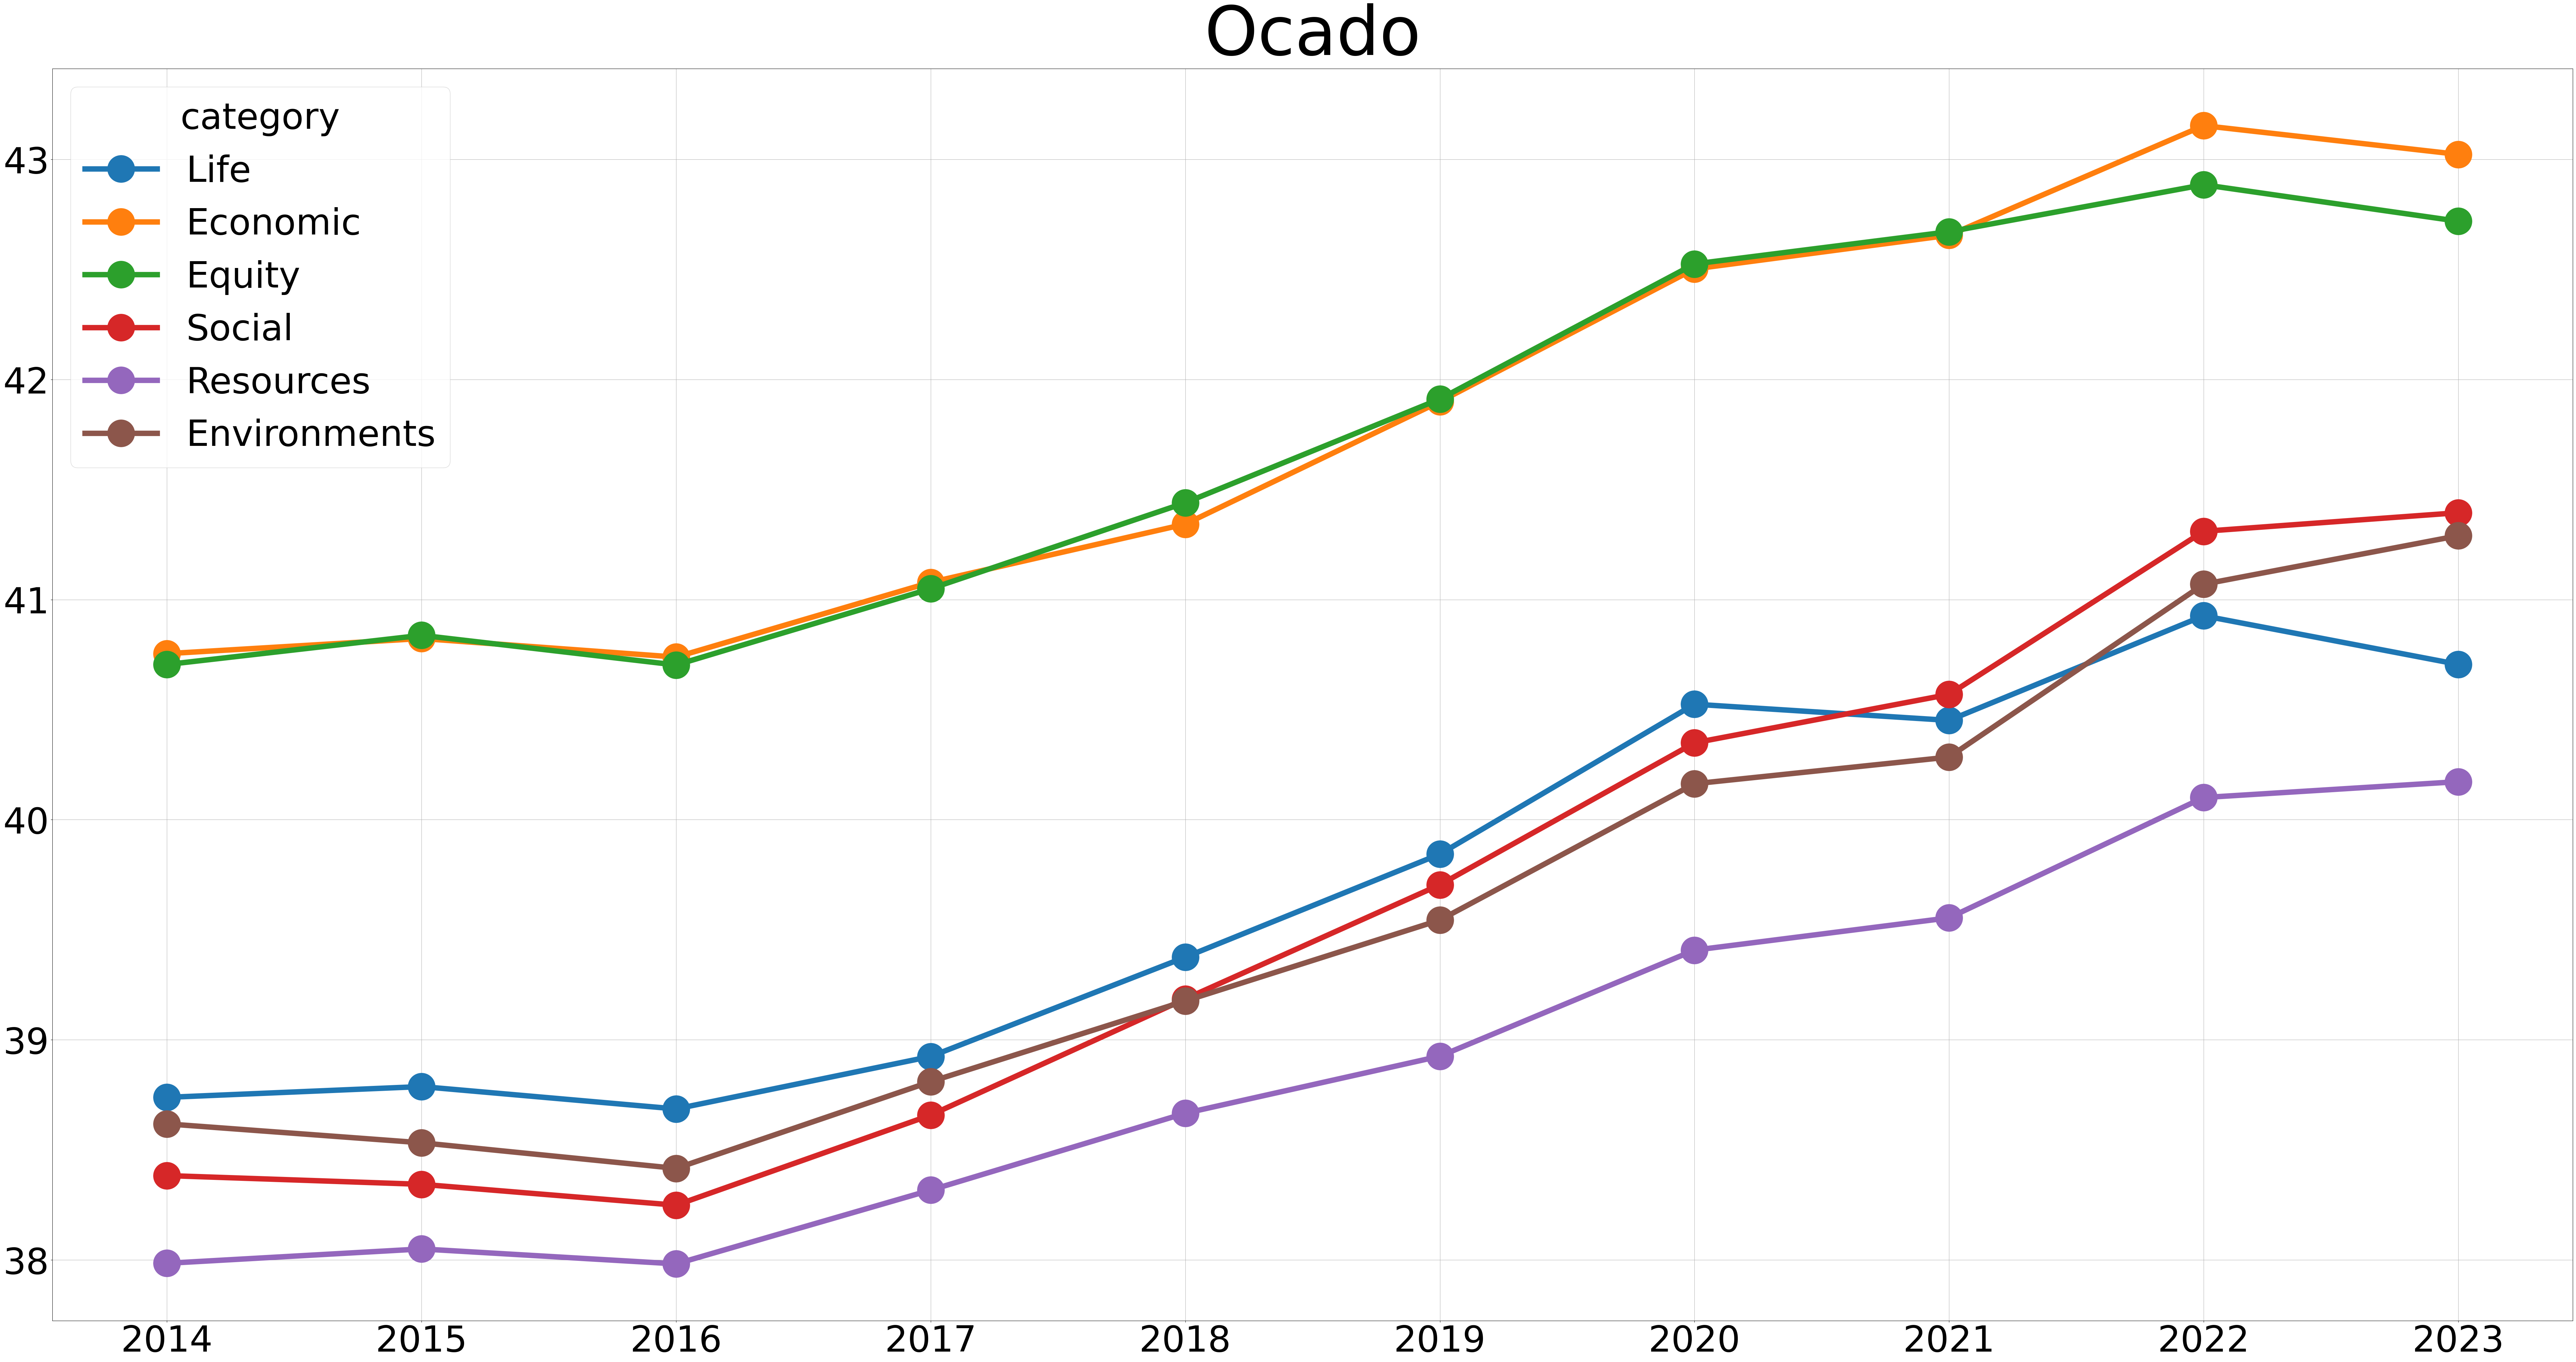

In [59]:
company = 'Ocado'

df_comp_c.loc[company].plot(marker='o', markersize = 60, linewidth = 12, legend = True)
plt.title(f'{company}', fontsize = 150)
plt.xlabel('')
plt.xticks(np.arange(10), year_list)
plt.grid(True)
plt.show()

## 2) Sentiment Analsysis

In [34]:
df_sentiment = df_result_s[['company','year','label','score']].copy()
df_sentiment

,company,year,label,score
0,Asda,2020,Positive,1.00
1,Asda,2020,Positive,1.00
2,Asda,2020,Positive,0.99
3,Asda,2020,Positive,0.99
4,Asda,2020,Positive,1.00
...,...,...,...,...
168271,Toyota,2023,Negative,0.02
168272,Toyota,2023,Negative,0.01
168273,Toyota,2023,Negative,0.03
168274,Toyota,2023,Negative,0.03


### Positive & Negative Ratio

In [35]:
df_comp_cnt = df_sentiment.groupby(['company','year'])['label'].apply(lambda x:x.value_counts()).unstack()
df_comp_cnt['Ratio'] = (df_comp_cnt['Positive'] / df_comp_cnt['Negative']).round(2)
df_comp_cnt

Negative  Positive  Ratio
company year                           
Asda    2020         5        23   4.60
        2021       159       355   2.23
        2022       131       255   1.95
        2023       145       376   2.59
Ford    2014      2809      5801   2.07
...                ...       ...    ...
Toyota  2019       204       560   2.75
        2020       209       605   2.89
        2021       433      1188   2.74
        2022       354       856   2.42
        2023       442      1026   2.32

[84 rows x 3 columns]

In [36]:
df_comp_ratio = df_comp_cnt['Ratio'].unstack(level=0)
df_comp_ratio

company,Asda,Ford,M&S,Ocado,Polestar,Sainsburys,Stellantis,Tesco,Tesla,Toyota
year,,,,,,,,,,
2014,NaN,2.07,2.20,0.96,NaN,4.12,2.45,2.27,NaN,1.69
2015,NaN,2.22,1.91,0.95,NaN,1.03,2.28,0.80,NaN,1.87
2016,NaN,2.84,2.04,0.97,NaN,1.15,2.53,0.89,NaN,1.66
2017,NaN,3.04,2.17,1.00,NaN,1.19,1.90,0.98,NaN,2.10
2018,NaN,2.95,2.71,0.93,NaN,3.68,2.71,0.94,1.47,2.62
2019,NaN,3.14,1.74,1.01,NaN,8.11,2.18,1.12,1.37,2.75
2020,4.60,3.25,1.63,1.10,1.25,6.18,2.32,1.14,1.51,2.89
2021,2.23,2.93,2.37,1.31,1.63,3.84,2.62,1.13,1.37,2.74
2022,1.95,3.83,2.82,1.26,1.02,5.08,2.70,1.11,1.10,2.42


In [37]:
# Change the order of columns (in the order of increasing ratio)
df_comp_ratio = df_comp_ratio[['Asda', 'Ford', 'M&S', 'Ocado', 'Polestar', 'Sainsburys', 'Stellantis', 'Tesco', 'Tesla', 'Toyota']]
df_comp_ratio

company,Asda,Ford,M&S,Ocado,Polestar,Sainsburys,Stellantis,Tesco,Tesla,Toyota
year,,,,,,,,,,
2014,NaN,2.07,2.20,0.96,NaN,4.12,2.45,2.27,NaN,1.69
2015,NaN,2.22,1.91,0.95,NaN,1.03,2.28,0.80,NaN,1.87
2016,NaN,2.84,2.04,0.97,NaN,1.15,2.53,0.89,NaN,1.66
2017,NaN,3.04,2.17,1.00,NaN,1.19,1.90,0.98,NaN,2.10
2018,NaN,2.95,2.71,0.93,NaN,3.68,2.71,0.94,1.47,2.62
2019,NaN,3.14,1.74,1.01,NaN,8.11,2.18,1.12,1.37,2.75
2020,4.60,3.25,1.63,1.10,1.25,6.18,2.32,1.14,1.51,2.89
2021,2.23,2.93,2.37,1.31,1.63,3.84,2.62,1.13,1.37,2.74
2022,1.95,3.83,2.82,1.26,1.02,5.08,2.70,1.11,1.10,2.42


In [38]:
from matplotlib import rcParams
rcParams['font.size'] = 80
plt.rc('figure', figsize=(100, 50))
rcParams['axes.unicode_minus'] = False
plt.style.use('tableau-colorblind10')

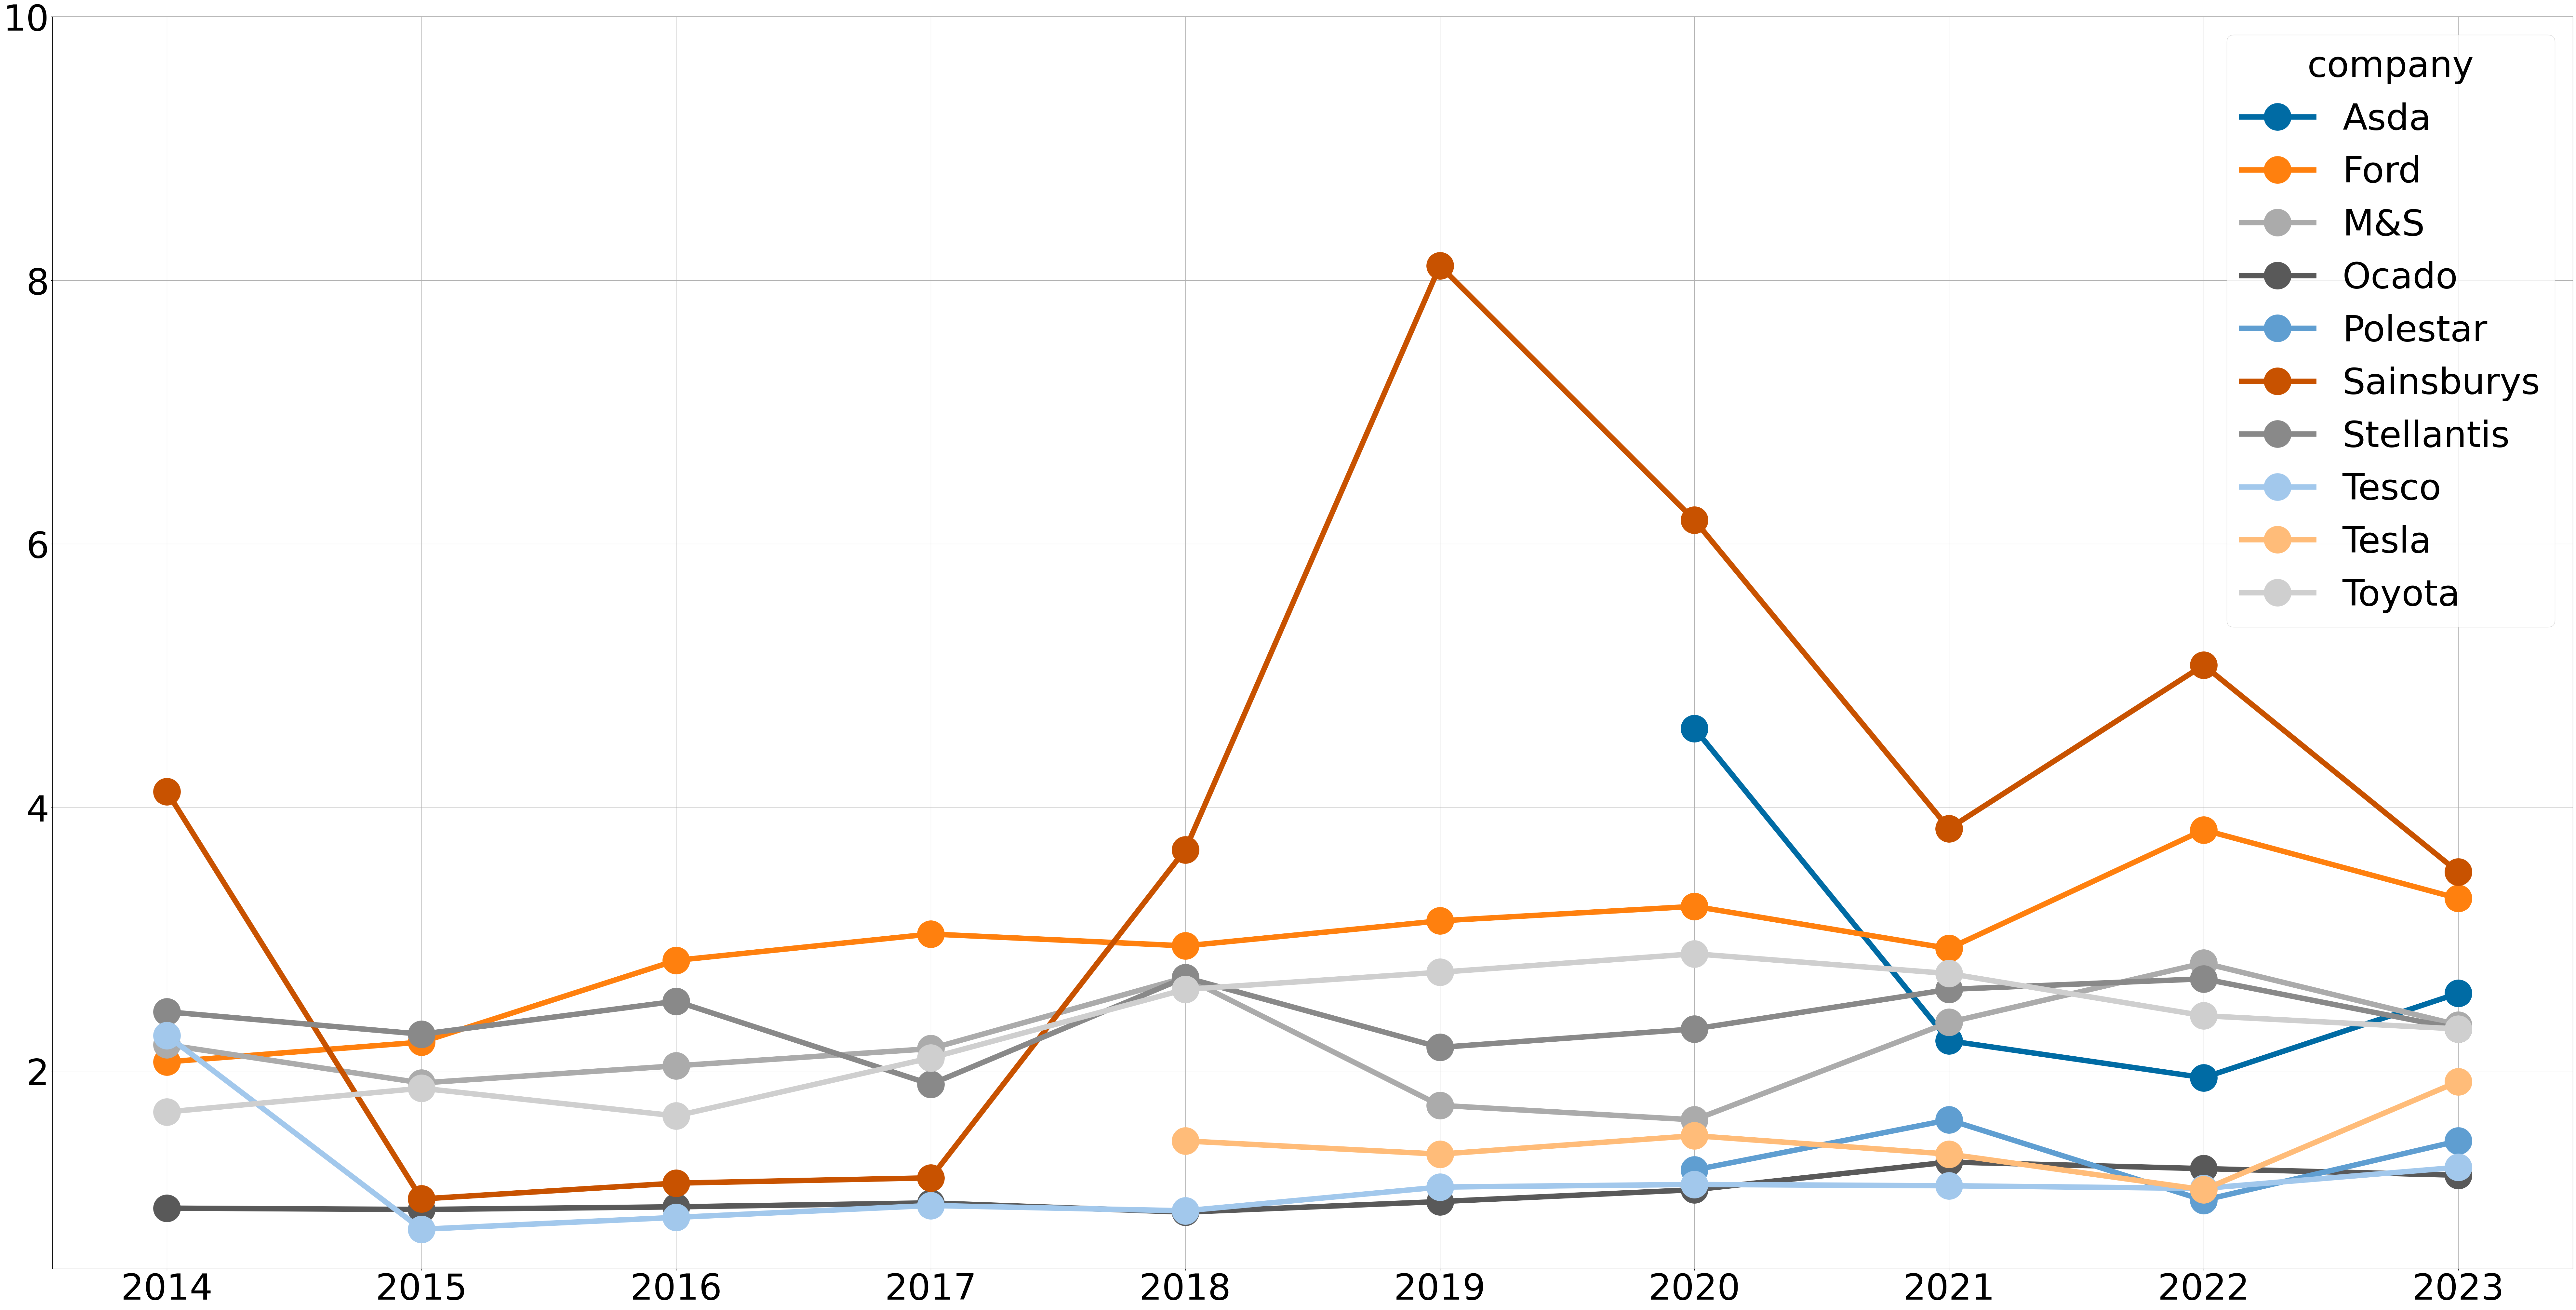

In [39]:
df_comp_ratio.plot(marker='o', markersize = 60, linewidth = 12, legend = True)
plt.grid(True)
plt.ylim([0.5, 10])
plt.xlabel('')
plt.xticks(np.arange(10), year_list)
plt.show()

---

In [ ]:
# End of file